# **Inference Code**

In [ ]:
%cd /content/drive/MyDrive/Chess_Detection/Combine

/content/drive/MyDrive/Chess_Detection/Combine


In [ ]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
HOME = os.getcwd()

## **Load Image**

In [ ]:
test_img_path = r'/content/drive/MyDrive/Chess_Detection/KeyPoint/data/aug4/images/05ad7223827a29a8283f6c4b2490f52f_jpg_0.jpg'

img = cv2.imread(test_img_path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb_copy = rgb_img.copy()
imgW,imgH = img.shape[0],img.shape[1]

## **Key Point Detection**

In [ ]:
ImgW_kp = 250
ImgH_kp = 250

model_path_kp = r'/content/drive/MyDrive/Chess_Detection/KeyPoint/Model_detectCorners.h5'

In [ ]:
from tensorflow.keras.models import load_model

model_kp = load_model(model_path_kp)
model_kp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 8, 8, 2048)        58331648  
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 512)         9437696   
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 8, 512)         2359808   
                                                                 
 conv2d_22 (Conv2D)          (None, 4, 4, 256)         1179904   
                                                                 
 conv2d_23 (Conv2D)          (None, 2, 2, 256)         262400    
                                                                 
 dropout (Dropout)           (None, 2, 2, 256)         0         
                                                                 
 conv2d_24 (Conv2D)          (None, 1, 1, 8)           8

In [ ]:
resized = cv2.resize(rgb_img, (ImgW_kp,ImgH_kp))
yhat = model_kp.predict(np.expand_dims(resized/255,0))

1/1 [==============================] - 4s 4s/step


In [ ]:
coords = yhat[0]

**Scale Coordinates for input image size**

In [ ]:
scaler = (imgW,imgH)
LU = np.multiply(coords[:2], scaler).astype(int)
RU = np.multiply(coords[2:4], scaler).astype(int)
LD = np.multiply(coords[4:6], scaler).astype(int)
RD = np.multiply(coords[6:], scaler).astype(int)

### **Plot KeyPoint Results**

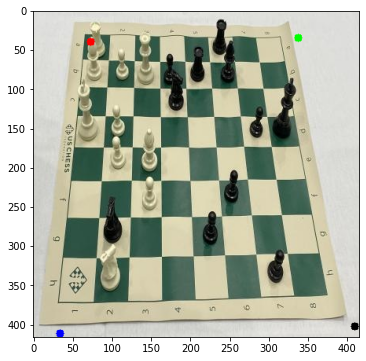

In [ ]:
plt.figure(figsize=(6,6))

tk = 5
cv2.circle(rgb_img, tuple(LU), tk, (255,0,0), -1)
cv2.circle(rgb_img, tuple(RU), tk, (0,255,0), -1)
cv2.circle(rgb_img, tuple(LD), tk, (0,0,255), -1)
cv2.circle(rgb_img, tuple(RD), tk, (0,0,0), -1)

plt.imshow(rgb_img);

## **Warp Perspective**

In [ ]:
print(LU, RU,LD,RD)

LU = [73, 40]
RU = [310,  35]
LD = [34, 370]
RD = [380, 370]

[23, -10] [360, -15] [-16, 420] [430, 420]


In [ ]:
#Add padding to output Image
x_pad = 18
y_pad = 18

LU = [LU[0]-x_pad, LU[1]-y_pad]
RU = [RU[0]+x_pad, RU[1]-y_pad]
LD = [LD[0]-x_pad, LD[1]+y_pad]
RD = [RD[0]+x_pad, RD[1]+y_pad]

In [ ]:
pts1 = np.float32([LU, RU,LD,RD])

pts1 = np.float32([LU, RU,LD,RD])
pts2 = np.float32([[0,0],[imgW,0],[0,imgH],[imgW,imgH]])

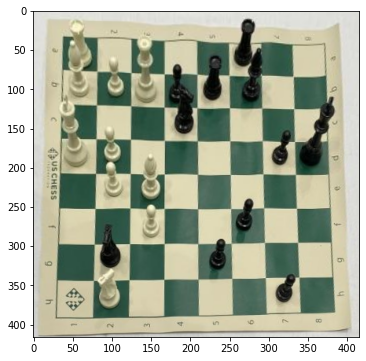

In [ ]:
plt.figure(figsize=(6,6))
matrix = cv2.getPerspectiveTransform(pts1,pts2)
output = cv2.warpPerspective(rgb_copy,matrix,(imgW,imgH))

plt.imshow(output);

### **Same Warp Images**

In [ ]:
save_wrap_dir = os.path.join(HOME,'save_warp_images')

if not os.path.exists(save_wrap_dir):
  os.makedirs(save_wrap_dir)

In [ ]:
from datetime import datetime
now = datetime.now()
save_img_name = f'WARP_IMG_{now.strftime("%d%m%Y__%H%M%S")}.jpg'
save_img_path = os.path.join(save_wrap_dir,save_img_name)

print(save_img_path)

# save warp image
cv2.imwrite(save_img_path,output)

/content/drive/MyDrive/Chess_Detection/Combine/save_warp_images/WARP_IMG_28012023__141954.jpg


True

## **Chess Peace Detection using YOLOv8**

In [ ]:
!pip install ultralytics

!yolo mode=Predict 

In [ ]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from mmap import ACCESS_DEFAULT

In [ ]:
yolo_path = r'/content/drive/MyDrive/Chess_Detection/Yolo_chess_project/YOLOv8/runs/detect/train3/weights/best.pt'

In [ ]:
#img_path = save_img_path
#img = cv2.imread(img_path)
img = output
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

model_yolo = YOLO(yolo_path)
results = model_yolo(source=img, conf=0.25)

#print(results)
# boxes = results[0].boxes
# box = boxes[0]  # returns one box
# print(box.xyxy)
#print(boxes.data) # raw bboxes tensor, (N, 6) or boxes.boxes 
#data = boxes.data


# for result in results:
#     boxes = result.boxes  # Boxes object for bbox outputs
#     probs = result.probs  # Class probabilities for classification outputs
#     print(boxes)
#     print("-----")


#detection_result_array = []

# for output in results:
#   print(len(output))
#   #print(output)
#   for detection in output:
#       print(detection)
#       print(detection.boxes)
#       %x1, y1, x2, y2, accuracy, type_ = detection.boxes
#       #print(type_, accuracy)
#       # print(x1,y1)
#       # print(x2,y2)
#       x1 = int(detection.boxes[0])
#       y1 = int(detection[1])
#       x2 = int(detection[2])
#       y2 = int(detection[3])
#       accuracy = int(detection[4])*100
#       class_label = int(detection[5])

#       print(x1,y1,x2,y2,class_label, accuracy)

#       detection_result_array.append((x1,y1,x2,y2,accuracy,class_label))
#       tk = 2
#       cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), tk)

# cv2_imshow(img)

Ultralytics YOLOv8.0.22 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
0: 416x416 3 bishops, 2 kings, 3 knights, 9 pawns, 1 queen, 3 rooks, 290.3ms
Speed: 2.1ms pre-process, 290.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


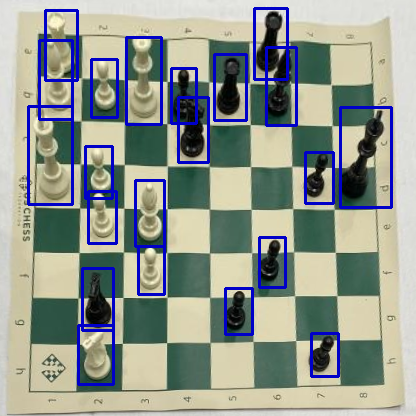

In [ ]:
detection_result_array = []
detcet_array = results[0].boxes
detcet_array = detcet_array.cpu().numpy()

for i,detect in enumerate(detcet_array):
  cor = detect.xyxy[0]
  detect_label = detect.cls
  detect_label = int(detect_label[0])
  x1 = int(cor[0])
  y1 = int(cor[1])
  x2 = int(cor[2])
  y2 = int(cor[3])
  tk = 2

  cv2.rectangle(img_RGB, (x1,y1), (x2,y2), (200,0,0), tk)
  detection_result_array.append((x1,y1,x2,y2,detect_label))

cv2_imshow(img_RGB)

In [ ]:
w,h = img.shape[0],img.shape[1]

In [ ]:
board_w, board_h = img.shape[0]-2*x_pad, img.shape[1]-2*y_pad

In [ ]:
r_width = board_h//8
c_width = board_w//8

board_coordinates = []
for c in range(8):
  for r in range(8):
    x1,y1 = c*r_width+x_pad, r*r_width+y_pad
    x2,y2 = (c+1)*c_width+x_pad, (r+1)*r_width+y_pad
    board_coordinates.append([(x1,y1),(x2,y2)])
    #print(x1,y1,x2,y2)
print(board_coordinates)

[[(18, 18), (65, 65)], [(18, 65), (65, 112)], [(18, 112), (65, 159)], [(18, 159), (65, 206)], [(18, 206), (65, 253)], [(18, 253), (65, 300)], [(18, 300), (65, 347)], [(18, 347), (65, 394)], [(65, 18), (112, 65)], [(65, 65), (112, 112)], [(65, 112), (112, 159)], [(65, 159), (112, 206)], [(65, 206), (112, 253)], [(65, 253), (112, 300)], [(65, 300), (112, 347)], [(65, 347), (112, 394)], [(112, 18), (159, 65)], [(112, 65), (159, 112)], [(112, 112), (159, 159)], [(112, 159), (159, 206)], [(112, 206), (159, 253)], [(112, 253), (159, 300)], [(112, 300), (159, 347)], [(112, 347), (159, 394)], [(159, 18), (206, 65)], [(159, 65), (206, 112)], [(159, 112), (206, 159)], [(159, 159), (206, 206)], [(159, 206), (206, 253)], [(159, 253), (206, 300)], [(159, 300), (206, 347)], [(159, 347), (206, 394)], [(206, 18), (253, 65)], [(206, 65), (253, 112)], [(206, 112), (253, 159)], [(206, 159), (253, 206)], [(206, 206), (253, 253)], [(206, 253), (253, 300)], [(206, 300), (253, 347)], [(206, 347), (253, 394)]

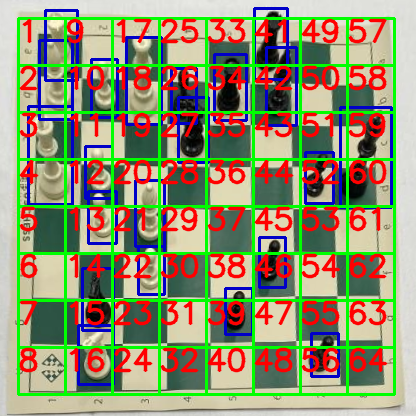

In [ ]:
draw_img = img_RGB.copy()

for i,cor in enumerate(board_coordinates):
  x1,y1 = cor[0]
  x2,y2 = cor[1]
  cv2.rectangle(draw_img, (x1,y1), (x2,y2), (0,255,0), 2)

  #text_org = ( (x1+x2//2) , (y1+y2)//2 )
  text_org = (x1 ,(y1+y2)//2)
  cv2.putText(draw_img, str(i+1), text_org, cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2, cv2.LINE_AA)

cv2_imshow(draw_img)
     

In [ ]:
# a8 --> white
rec_1 = ['a','b','c','d','e','f','g','h']
rec_2 = range(1,8+1)

square_dict = {}
c = 0
for i in range(8):
  for j in range(8):
    c+=1
    square_rec = f'{rec_1[j]}{rec_2[i]}'
    square_dict[c] = square_rec
    #print(c,square_rec)
    #print(f'{i+1}')
print(square_dict)

{1: 'a1', 2: 'b1', 3: 'c1', 4: 'd1', 5: 'e1', 6: 'f1', 7: 'g1', 8: 'h1', 9: 'a2', 10: 'b2', 11: 'c2', 12: 'd2', 13: 'e2', 14: 'f2', 15: 'g2', 16: 'h2', 17: 'a3', 18: 'b3', 19: 'c3', 20: 'd3', 21: 'e3', 22: 'f3', 23: 'g3', 24: 'h3', 25: 'a4', 26: 'b4', 27: 'c4', 28: 'd4', 29: 'e4', 30: 'f4', 31: 'g4', 32: 'h4', 33: 'a5', 34: 'b5', 35: 'c5', 36: 'd5', 37: 'e5', 38: 'f5', 39: 'g5', 40: 'h5', 41: 'a6', 42: 'b6', 43: 'c6', 44: 'd6', 45: 'e6', 46: 'f6', 47: 'g6', 48: 'h6', 49: 'a7', 50: 'b7', 51: 'c7', 52: 'd7', 53: 'e7', 54: 'f7', 55: 'g7', 56: 'h7', 57: 'a8', 58: 'b8', 59: 'c8', 60: 'd8', 61: 'e8', 62: 'f8', 63: 'g8', 64: 'h8'}


In [ ]:
peace_dict = {0 : 'bishop', 1 : 'king', 2 : 'knight', 3 : 'pawn', 4 : 'queen', 5: 'rook'}

In [ ]:
yolo_positions = detection_result_array
for pos in yolo_positions:
  bw_threshold = 100
  x1,y1,x2,y2,det_class = pos
  #print(det_class)
  crop_peace = img[y1:y2,x1:x2]
  crop_peace_resize = cv2.resize(crop_peace,(32,64))  # (w,h)
  crop_peace_mean = np.mean(crop_peace_resize)

  if crop_peace_mean > 100:
    peace_colour = "white"
  else: 
    peace_colour = "black"
  print(crop_peace_mean,peace_colour)                                  
  #cv2_imshow(crop_peace_resize)

79.60188802083333 black
65.72786458333333 black
146.322265625 white
135.53873697916666 white
111.9970703125 white
100.4296875 white
65.625 black
165.90804036458334 white
142.1953125 white
145.54296875 white
149.69856770833334 white
131.36783854166666 white
132.38948567708334 white
85.33805338541667 black
62.955403645833336 black
151.73291015625 white
78.49251302083333 black
103.34423828125 white
104.609375 white
154.54915364583334 white
62.126139322916664 black


In [ ]:
from collections import namedtuple

def area(a, square_coor):  # returns None if rectangles don't intersect
    # a -- > x1,y1,x2,y2
    dx = min(a[2], square_coor[2]) - max(a[0], square_coor[0])
    dy = min(a[3], square_coor[3]) - max(a[1], square_coor[1])
    #print(dx,dy)
    if (dx>=0) and (dy>=0):
      square_area = (square_coor[2]-square_coor[0])*(square_coor[3]-square_coor[1])
      return dx*dy / (square_area)
    else:
      return 0

In [ ]:
def find_peace_colour(peace_coordinate):
  bw_threshold = 100
  x1,y1,x2,y2 = peace_coordinate[:4]
  #print(det_class)
  crop_peace = img[y1:y2,x1:x2]
  crop_peace_resize = cv2.resize(crop_peace,(32,64))  # (w,h)
  crop_peace_mean = np.mean(crop_peace_resize)

  if crop_peace_mean > bw_threshold:
    return "white"
  else: 
    return "black"
     

In [ ]:
def calc_peace_square(board_coordinates,yolo_detection):

  peace_pos = yolo_detection[:4]
  peace_detect = yolo_detection[4]

  max_ratio = 0
  peace_square_coor = None
  for i,chess_bb in enumerate(board_coordinates):
    bx1,by1 = chess_bb[0]
    bx2,by2 = chess_bb[1]
    bb = (bx1,by1,bx2,by2)

    interscetion_ratio = area(peace_pos, bb)

    if interscetion_ratio > max_ratio:
      max_ratio = interscetion_ratio
      peace_square_coor = i+1
      #print(i+1,interscetion_ratio)
   
  #print(peace_square_coor,max_ratio)
  peace_colour = find_peace_colour(yolo_detection)
  square = square_dict[peace_square_coor]
  peace = peace_dict[peace_detect]
  return peace_colour,peace,square


In [ ]:
white_peace_array = []
black_peace_array = []

for yolo_pos in yolo_positions:
  peace_colour,peace_detect,peace_square = calc_peace_square(board_coordinates,yolo_pos)
  if peace_colour == "white":
    white_peace_array.append([peace_detect,peace_square])
  elif peace_colour == "black":
    black_peace_array.append([peace_detect,peace_square])

print(white_peace_array)
print(black_peace_array)

[['king', 'c1'], ['queen', 'b3'], ['king', 'c8'], ['pawn', 'd7'], ['pawn', 'f3'], ['pawn', 'd2'], ['bishop', 'e3'], ['pawn', 'e2'], ['knight', 'h2'], ['pawn', 'b2'], ['bishop', 'b1'], ['pawn', 'h7'], ['rook', 'a6'], ['rook', 'a1']]
[['rook', 'b5'], ['knight', 'f2'], ['knight', 'c4'], ['pawn', 'f6'], ['pawn', 'b4'], ['pawn', 'g5'], ['bishop', 'b6']]


In [ ]:
# save prediction results to json file
# import json
# with open("file.json", 'w') as f:
#     json.dump(detection_result_array, f, indent=2)